In [1]:

# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17360, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 17360 (delta 32), reused 13 (delta 10), pack-reused 17308 (from 4)
Receiving objects: 100% (17360/17360), 16.26 MiB | 2.45 MiB/s, done.
Resolving deltas: 100% (11896/11896), done.
/home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5


In [3]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Setup complete. Using torch 2.6.0+cu124 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3050 6GB Laptop GPU', major=8, minor=6, total_memory=5930MB, multi_processor_count=20, uuid=2bda18cf-022c-f39d-c336-f0ebc14b68e5, L2_cache_size=1MB)


In [4]:
%cp /home/vivek-sharma/Desktop/xml_project/ANVESHAN/data.yaml /home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5/

%cat /home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5/data.yaml
%cd /home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5/


train: ../f2/images/train
val: ../f2/images/val

nc: 5
names: ['hello', 'iloveyou', 'no','thanks', 'yes']
/home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5


In [5]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Device Count:", torch.cuda.device_count())
print("Current CUDA Device:", torch.cuda.current_device())
print("CUDA Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


CUDA Available: True
CUDA Device Count: 1
Current CUDA Device: 0
CUDA Device Name: NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [6]:
!nvidia-smi


Mon Mar 31 03:18:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              5W /   40W |      11MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
%cd /home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5/
import os
os.environ["MPLBACKEND"] = "Agg"  # Set backend before importing matplotlib

import matplotlib
matplotlib.use('Agg')  # Use a valid non-interactive backend
 # Use a non-interactive backend

!python train.py --img 416 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --device cuda:0


/home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=cuda:0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 5931MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_e

In [13]:
!nvidia-smi

Mon Mar 31 03:25:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   61C    P3             17W /   40W |      11MiB /   6144MiB |      9%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
# # we can also output some older school graphs if the tensor board isn't working for whatever reason...
# from utils.plots import plot_results  # plot results.txt as results.png
# Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png
import os
print(os.listdir("runs/train/"))


['exp']


In [15]:
import os
print(os.listdir("runs/train/exp/"))


['train_batch1.jpg', 'train_batch0.jpg', 'val_batch0_pred.jpg', 'val_batch1_labels.jpg', 'results.csv', 'val_batch0_labels.jpg', 'val_batch1_pred.jpg', 'R_curve.png', 'weights', 'PR_curve.png', 'labels.jpg', 'hyp.yaml', 'train_batch2.jpg', 'opt.yaml', 'F1_curve.png', 'P_curve.png', 'labels_correlogram.jpg', 'results.png', 'confusion_matrix.png']


In [2]:
import os
os.chdir('/home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5')  # Change to YOLOv5 directory

from utils.plots import plot_results


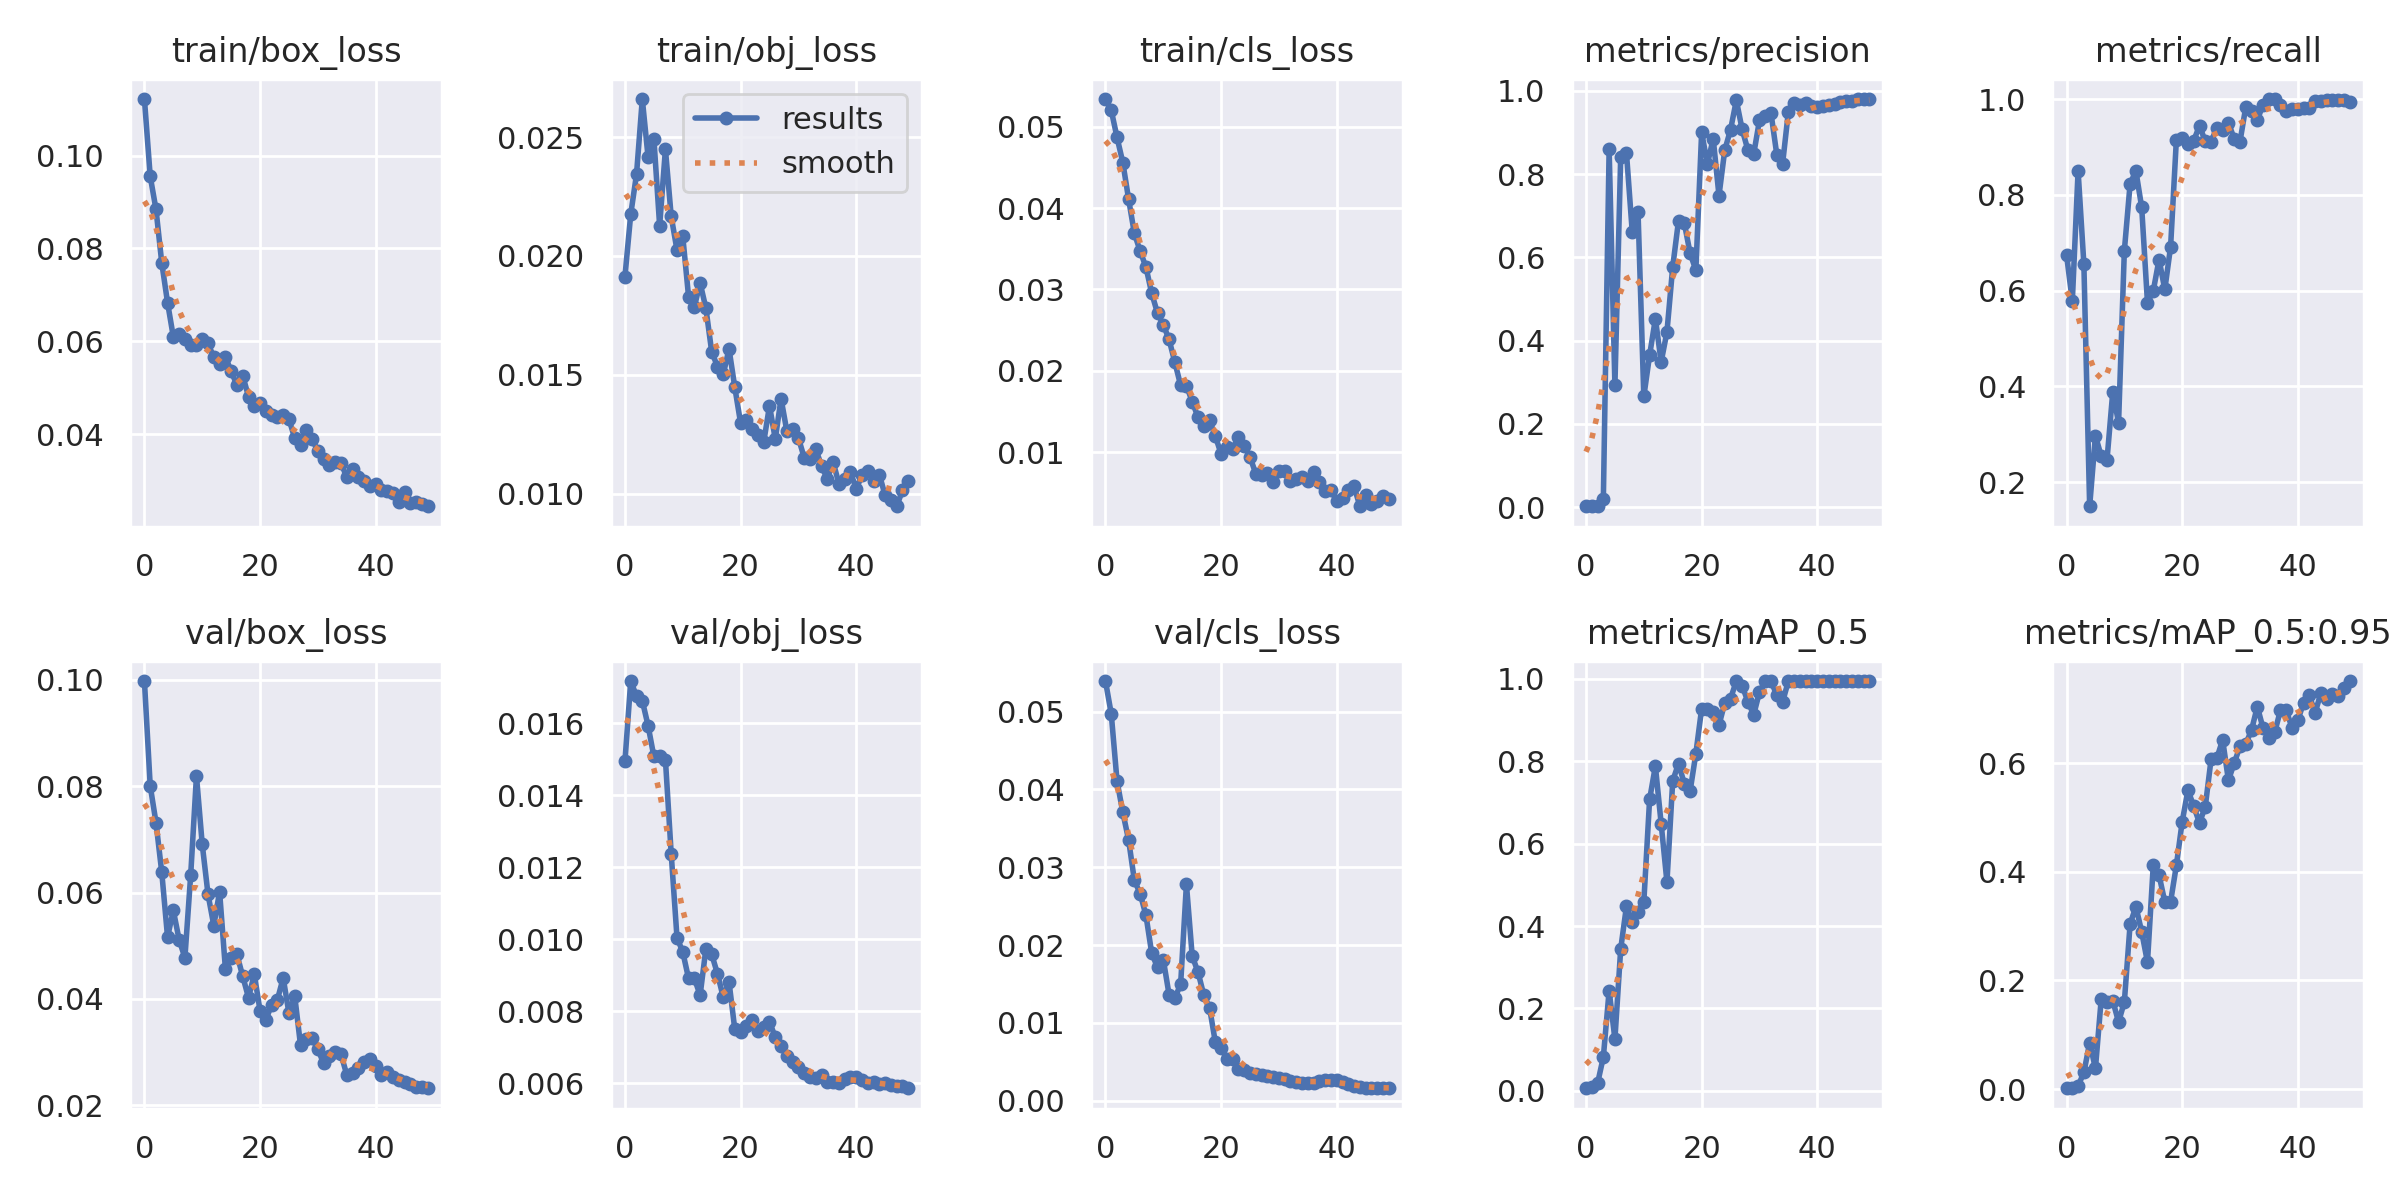

In [3]:
from IPython.display import Image
Image(filename='runs/train/exp/results.png', width=1000)


GROUND TRUTH TRAINING DATA:


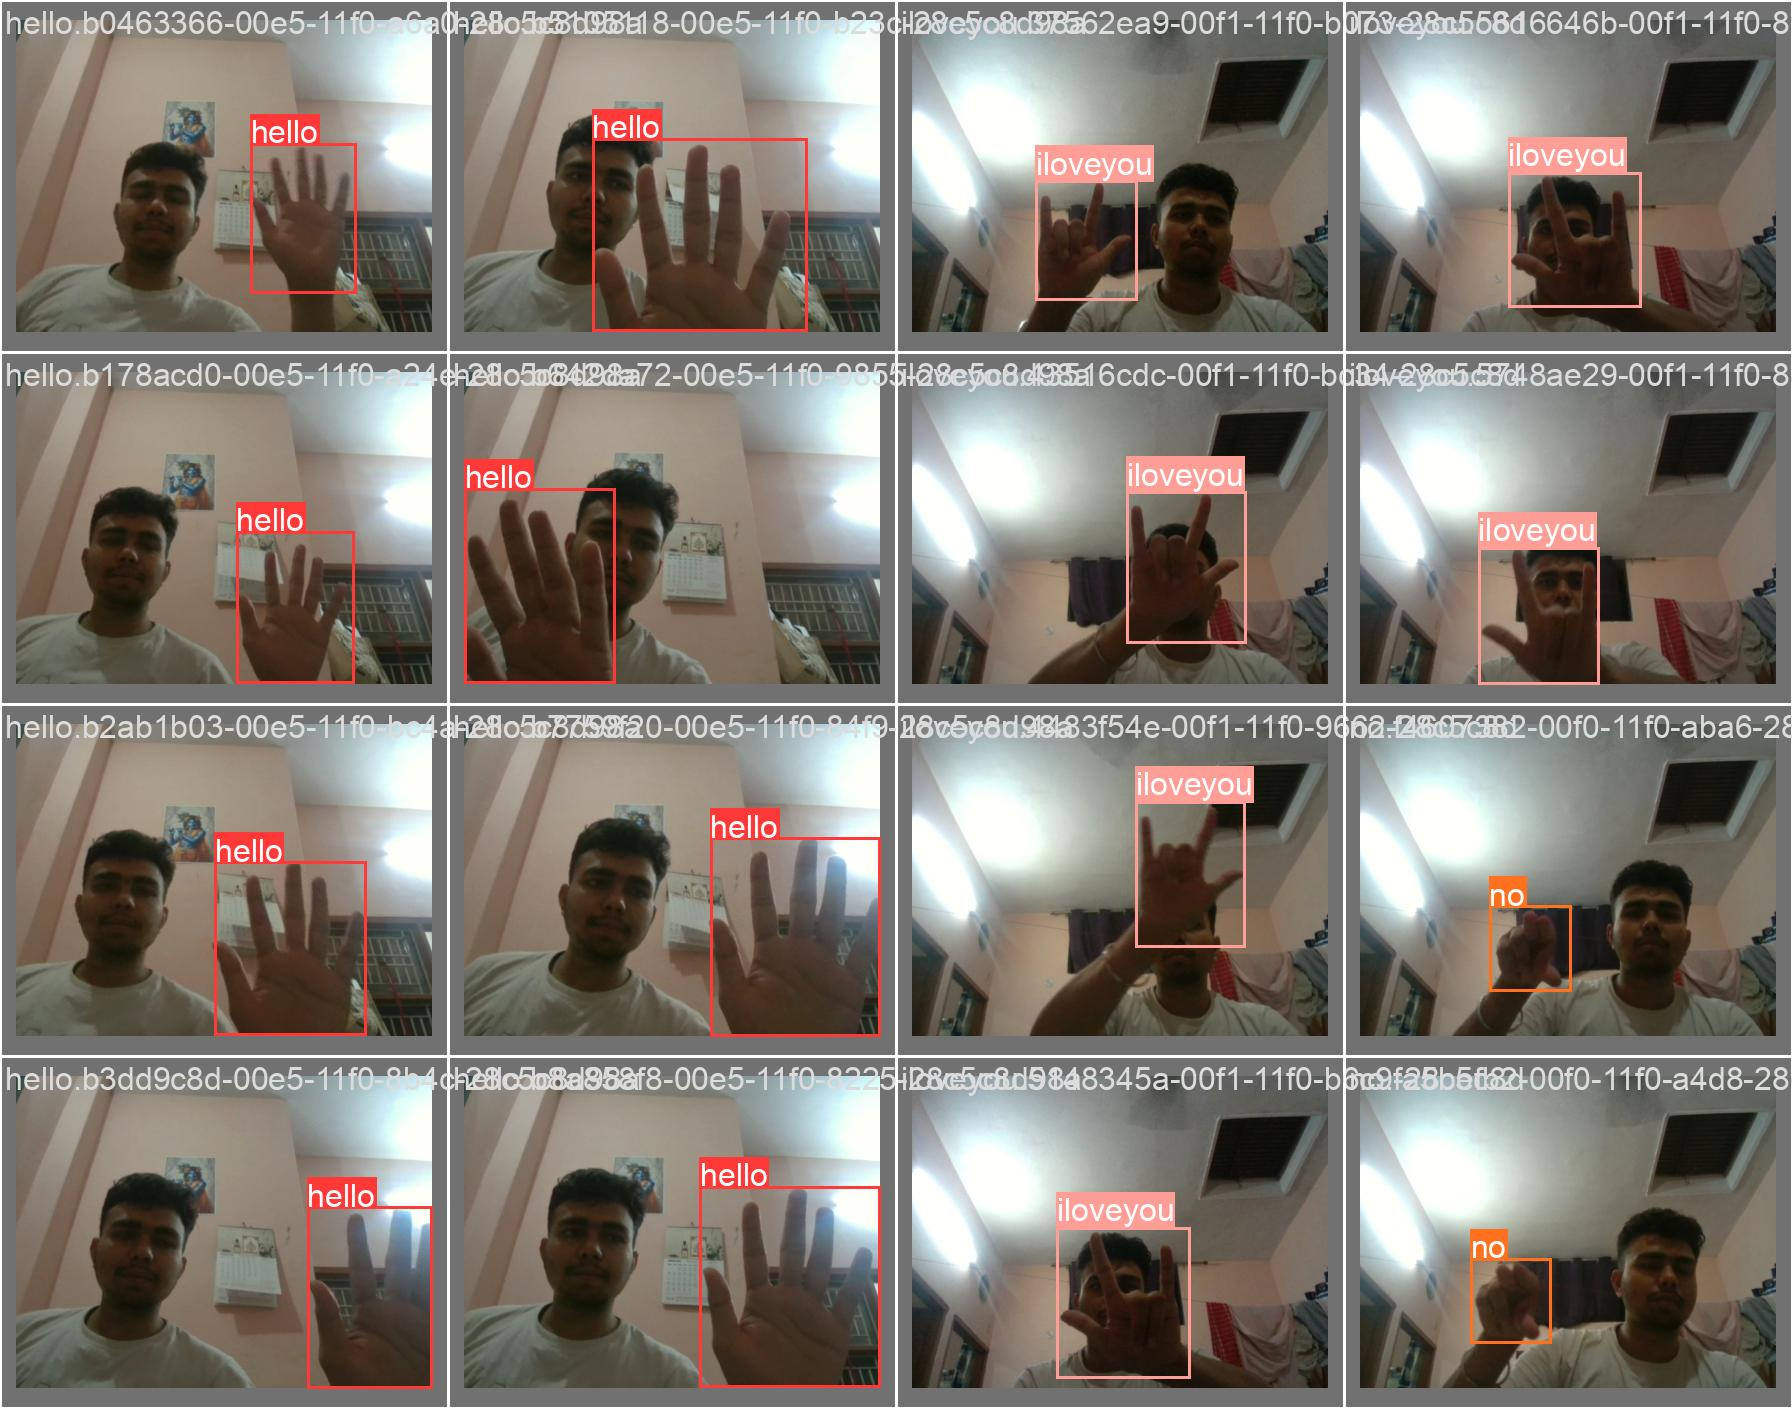

In [5]:
from IPython.display import Image
print("GROUND TRUTH TRAINING DATA:")
Image(filename='runs/train/exp/val_batch0_labels.jpg', width=900)


GROUND TRUTH AUGMENTED TRAINING DATA:


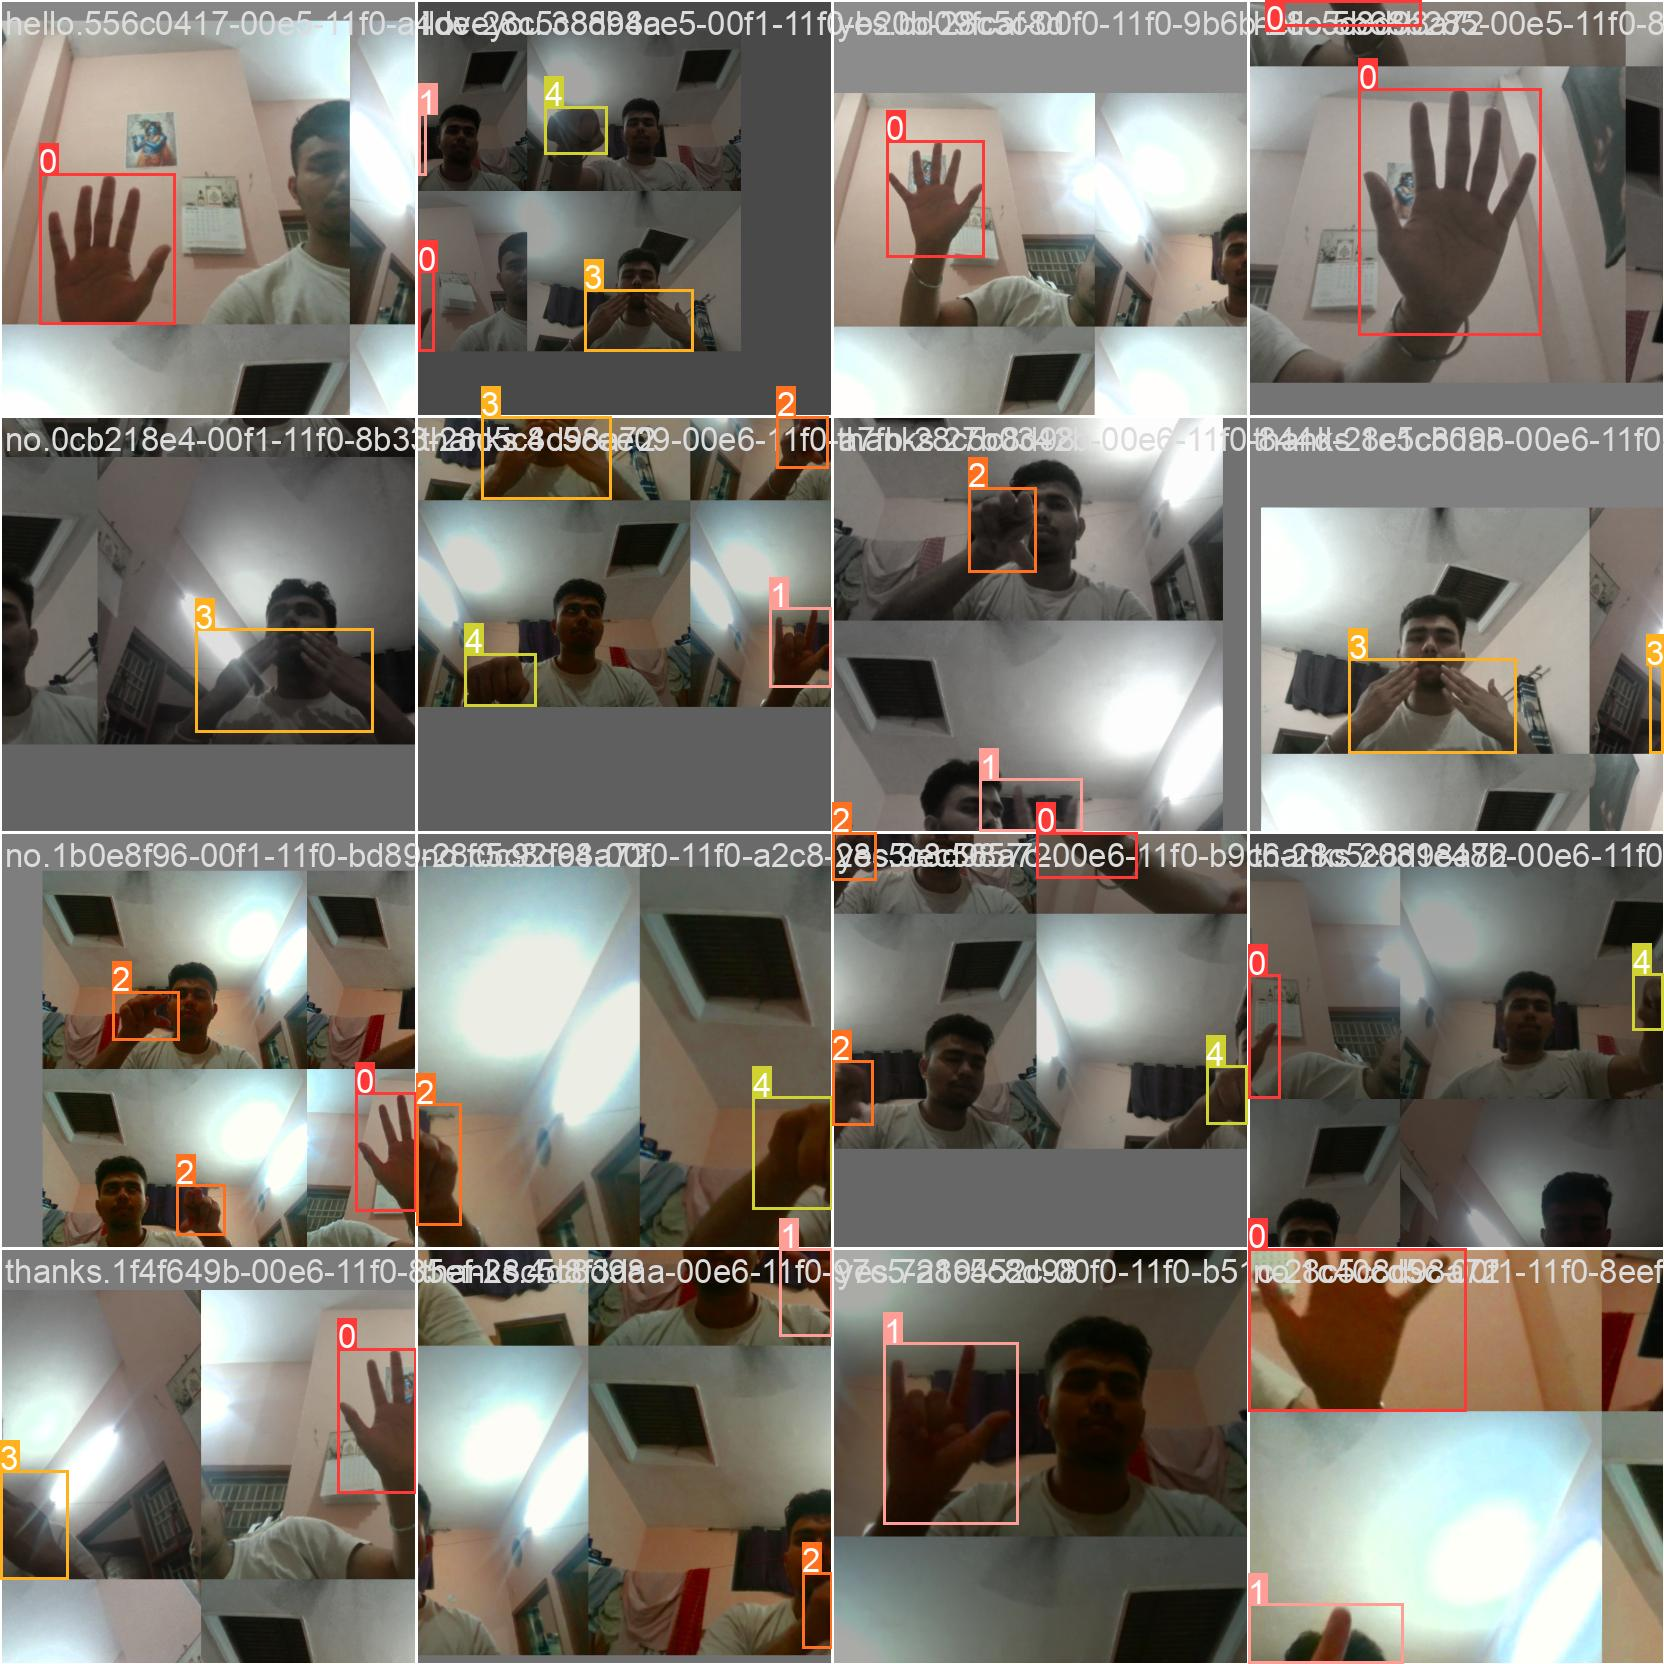

In [6]:
from IPython.display import Image
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='runs/train/exp/train_batch0.jpg', width=900)


In [7]:

# trained weights are saved by default in our weights folder
%ls runs/

train/


In [8]:
%cd Desktop/xml_project/ANVESHAN/yolov5/
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source ../f2/images/val/


[Errno 2] No such file or directory: 'Desktop/xml_project/ANVESHAN/yolov5/'
/home/vivek-sharma/Desktop/xml_project/ANVESHAN
detect: weights=['runs/train/exp/weights/best.pt'], source=../f2/images/val/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 5931MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/35 /home/vivek-sharma/Desktop/xml_project/ANVESHAN/f2/images/val/hello.b0463366-00e5-11f0-a6a0-28c5c8d98a72.jpg: 320x416 1 hello, 63.1ms
image 2/35 /home/viv

In [9]:

#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [10]:

!python detect.py --weights runs/train/exp/weights/best.pt --source 0 --img 416 --conf 0.5


detect: weights=['runs/train/exp/weights/best.pt'], source=0, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 5931MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
1/1: 0...  Success (inf frames 640x480 at 30.00 FPS)

0: 320x416 (no detections), 189.4ms
0: 320x416 (no detections), 11.3ms
0: 320x416 (no detections), 8.7ms
0: 320x416 (no detections), 6.7ms
0: 320x416 (no detections), 6.2ms
0: 320x416 (no detections), 5.8ms
0: 320x416 (no detections), 6.5ms
0: 320x416

In [11]:
%cp /home/vivek-sharma/Desktop/xml_project/ANVESHAN/yolov5/runs/train/exp/weights/best.pt /home/vivek-sharma/Desktop/xml_project/ANVESHAN/model/